# **Word Embeddings**

Before getting into $word2vec$, let's establish an understanding of what word embeddings are. It is important to know because the overall result and output of $word2vec$ will be embeddings associated with each unique word passed through the algorithm. A machine cannot process text in its raw form, thus converting the text into an embedding will allow users to feed the embedding to classic machine learning models. The simplest embedding would be a one-hot encoding of text data where each vector would be mapped to a category.

***Word Embeddings is a technique where individual words get transformed into a numerical representation of the word (i.e., a vector). Each word gets mapped to one vector, and this vector is then learned in a way that resembles a neural network. The vectors try to capture various characteristics of that word with regard to the overall text. These characteristics can include the semantic relationship of the word, definitions, context, etc. With these numerical representations, we can do many things like identify similarities or dissimilarities between words.***

# **Word2Vec Architecture**

The effectiveness of $Word2Vec$ comes from its ability to group vectors of similar words. Given a large enough dataset, $Word2Vec$ can make strong estimates about a word's meaning based on its occurrences in the text. These estimates yield word associations with other words in the corpus. For example, words like "$King$" and "$Queen$" would be very similar to one another. When conducting algebraic operations on word embeddings, we can find a close approximation of word similarities. For example, the $N$ dimensional embedding vector of "$King$" $-$ the $N$-dimensional embedding vector of "$Man$" $+$ the $N$-dimensional embedding vector of "$Woman$" yielded a $N$-dimensional embedding vector which is very close to the embedding vector of "$Queen$".

> [**The Illustrated Word2vec - Jay Alammar**](https://jalammar.github.io/illustrated-word2vec/)

# **Word2Vec and Text Classification**

$Word2vec$ is a group of related models that data scientists use to produce word embeddings, which are numeric representations for words. For example, a word embedding lexicon may provide a 100-number vector for each word in the English dictionary. $Word2vec$ is one such embedding.

Word2vec is implemented using a shallow two-layer neural network that is trained to reconstruct linguistic contexts of words. Word2vec takes as its input a large corpus of text and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus assigned a corresponding vector in high dimension space. Similar words will have similar vectors in this high dimension space.[**[Cite:mikolov2013efficient]**](https://arxiv.org/abs/1301.3781)

### Suggested Software for Word2Vec

The following URLs provide useful software and data for working with Word2vec.

* [**GoogleNews Vectors**](https://code.google.com/archive/p/word2vec/)
* [**GitHub Mirror**](https://github.com/mmihaltz/word2vec-GoogleNews-vectors)
* [**Python Gensim**](https://radimrehurek.com/gensim/)

The Python package Gensim is used in this chapter to work with $Word2vec$ vectors. It is also necessary to load the embedding lookup table.

In [ ]:
from tensorflow.keras.utils import get_file

try:
    path = get_file(
        "GoogleNews-vectors-negative300.bin.gz",
        origin="https://s3.amazonaws.com/dl4j-distribution/"
        + "GoogleNews-vectors-negative300.bin.gz",
    )
except:
    print("Error Downloading")
    raise

print(path)

1647058944/1647046227 [==============================] - 103s 0us/step
/root/.keras/datasets/GoogleNews-vectors-negative300.bin.gz


The following code loads the vector lookup tables and prepares Gensim for use.

In [ ]:
import gensim

# Not that the path below refers to a location on my hard drive. You should download GoogleNews Vectors (see suggested software above).
model = gensim.models.KeyedVectors.load_word2vec_format(path, binary=True)

$Word2vec$ makes each word a vector. We are using the 300-number vector, which can be seen for the word "hello".

In [ ]:
w = model["hello"]

print(len(w))

300


In [ ]:
print(w)

[-0.05419922  0.01708984 -0.00527954  0.33203125 -0.25       -0.01397705
 -0.15039062 -0.265625    0.01647949  0.3828125  -0.03295898 -0.09716797
 -0.16308594 -0.04443359  0.00946045  0.18457031  0.03637695  0.16601562
  0.36328125 -0.25585938  0.375       0.171875    0.21386719 -0.19921875
  0.13085938 -0.07275391 -0.02819824  0.11621094  0.15332031  0.09082031
  0.06787109 -0.0300293  -0.16894531 -0.20800781 -0.03710938 -0.22753906
  0.26367188  0.012146    0.18359375  0.31054688 -0.10791016 -0.19140625
  0.21582031  0.13183594 -0.03515625  0.18554688 -0.30859375  0.04785156
 -0.10986328  0.14355469 -0.43554688 -0.0378418   0.10839844  0.140625
 -0.10595703  0.26171875 -0.17089844  0.39453125  0.12597656 -0.27734375
 -0.28125     0.14746094 -0.20996094  0.02355957  0.18457031  0.00445557
 -0.27929688 -0.03637695 -0.29296875  0.19628906  0.20703125  0.2890625
 -0.20507812  0.06787109 -0.43164062 -0.10986328 -0.2578125  -0.02331543
  0.11328125  0.23144531 -0.04418945  0.10839844 -0.28

The code below shows the distance between two words.

In [ ]:
import numpy as np

w1 = model["king"]
w2 = model["queen"]

dist = np.linalg.norm(w1 - w2)

print(dist)

2.4796925


This shows the classic $Word2vec$ equation of **queen = (king - man) + female**

In [ ]:
model.most_similar(positive=["woman", "king"], negative=["man"])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]

The following code shows which item does not belong with the others.

In [ ]:
model.doesnt_match("house garage store dog".split())

'dog'

The following code shows the similarity between two words.

In [ ]:
model.similarity("iphone", "android")

0.5633577

The following code shows which words are most similar to the given one.

In [ ]:
model.most_similar("dog")

[('dogs', 0.8680489659309387),
 ('puppy', 0.8106428384780884),
 ('pit_bull', 0.780396044254303),
 ('pooch', 0.7627377510070801),
 ('cat', 0.7609456777572632),
 ('golden_retriever', 0.7500902414321899),
 ('German_shepherd', 0.7465174198150635),
 ('Rottweiler', 0.7437614798545837),
 ('beagle', 0.7418621778488159),
 ('pup', 0.740691065788269)]

# **Word2Vec - Project**

The attached file **data180.txt** contains word2vec word embedding data for 180 words. There are 90 nouns and 90 verbs. A word embedding vector is a feature representation of a word $-$ words that are similar in meaning should have similar feature vectors.

In each line of the text file, there is a word (e.g., 'make'), the word class of the word (i.e., one of 'NOUN' or 'VERB'), followed by the 300 elements of the word embedding vector $-$ each word embedding vector contains 300 feature dimensions.

For example, here is the start of the first two lines of the file:

*   include VERB 0.040351 -0.030021 -0.085623 ...
*   make VERB -0.041367 0.015907 -0.034492 ...

The file is space-delimited. There are 180 rows and 302 columns (a column for the word, the word class, and the 300 feature values).

1.   Fit a classifier (using any suitable classification method) that can predict the word class of a word from the word embedding vector.
2.   As part of the solution to Question (1), perform a suitable evaluation of the classifier's accuracy.
3.   Create a suitable visualization of the data.

In [ ]:
# Import Library.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Load Dataset.
data = pd.read_csv("data180.txt", sep=" ", header=None)
print(data)

          0     1         2         3    ...       298       299       300       301
0     include  VERB  0.040351 -0.030021  ...  0.078125  0.016417  0.013762 -0.030943
1        make  VERB -0.041367  0.015907  ...  0.011047  0.026907 -0.034353 -0.006957
2         use  VERB -0.035768 -0.003490  ...  0.026272  0.013420  0.031206 -0.000174
3      become  VERB -0.133110 -0.066619  ...  0.026415  0.044692  0.006816  0.035465
4        take  VERB -0.015930  0.004636  ...  0.023425  0.052553  0.015348 -0.073867
..        ...   ...       ...       ...  ...       ...       ...       ...       ...
175  remember  VERB -0.062209  0.015107  ... -0.010216  0.021228  0.031452 -0.046289
176      like  VERB -0.044383  0.056583  ... -0.084965  0.051330 -0.003723 -0.024393
177       kid  NOUN  0.035409  0.030959  ... -0.015089  0.019693  0.001632 -0.042046
178       guy  NOUN  0.057785  0.116421  ... -0.066361  0.046182 -0.049988 -0.035817
179     might  VERB  0.012142  0.044494  ...  0.021978  0.075516 

In [ ]:
# Split Dataset into Feature and Target Set.
X = data.iloc[:, 2:302]
y = data.iloc[:, 1]

# Extract Words.
words = data.iloc[:, 0]
words = words.to_list()

# Encode Categorical Features.
y = y.apply(lambda x: 1 if x == "VERB" else 0)

# Split Dataset into Training and Test Set.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# **Data Visualization - Word Embedding Space**

Implementing PCA using the NumPy library. The steps involved in PCA are as follows:

1.   Standardize the dataset and compute the correlation matrix.
2.   Calculate the eigen values and eigen vectors using eigen decomposition.
3.   Sort the eigen values and their corresponding eigen vectors.
4.   Pick the top two eigen values to create a matrix of eigen vectors.
5.   Transform the original data using the dot product with these new eigen vectors.





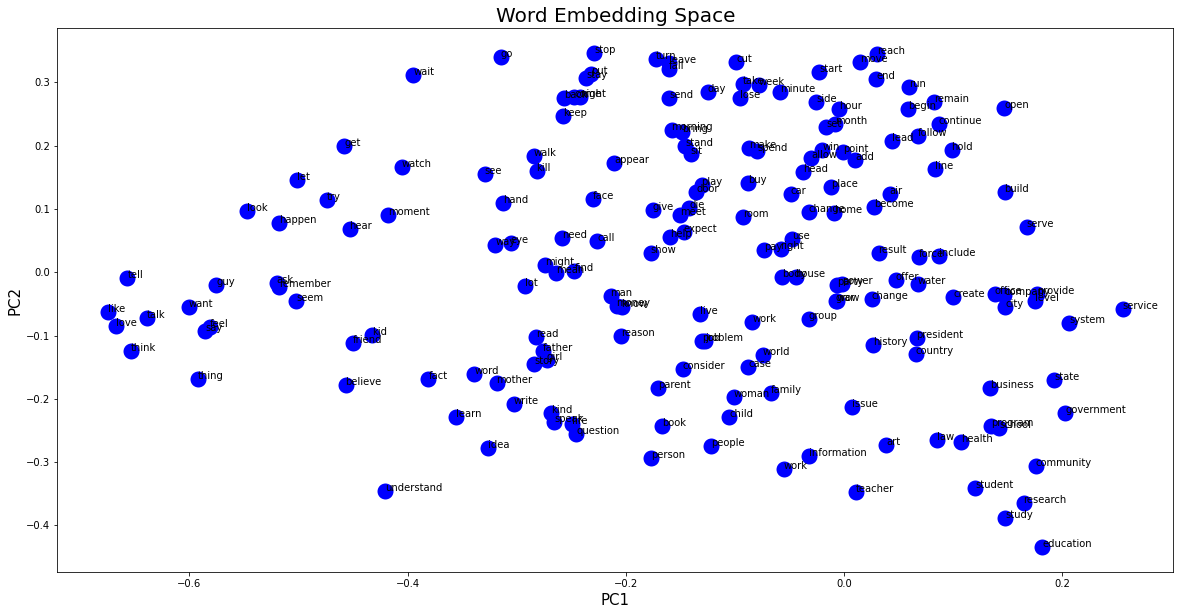

In [ ]:
# Compute the Correlation Matrix.
X_corr = X.corr()

# Compute the eigen values and eigen vectors.
values, vectors = np.linalg.eig(X_corr)

# Sort the eigen vectors corresponding to eigen values in descending order.
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

# Take the first 2 components that explain maximum variance for projecting.
new_vectors = vectors[:, :2]

# Project it onto a new dimension with 2 axes.
new_X = np.dot(X, new_vectors)

# Visualization Plot.
plt.figure(figsize=(20, 10))
plt.scatter(new_X[:, 0], new_X[:, 1], linewidths=10, color="blue")
plt.xlabel("PC1", size=15)
plt.ylabel("PC2", size=15)
plt.title("Word Embedding Space", size=20)
for i, word in enumerate(words):
    plt.annotate(word, xy=(new_X[i, 0], new_X[i, 1]))

# **Classification Model.**

Used 3 different classification models for evaluation. They are:

1.   Random Forest Classifier
2.   SVM Classifier
3.   Bidirectional LSTM Classifier

### **Random Forest Classifier.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Fit Classifier on Training Data.
rf_clf = RandomForestClassifier(n_estimators=40, criterion="gini", random_state=42).fit(
    X_train, y_train
)

# Predict Test Results.
y_pred = rf_clf.predict(X_test)

# Predictions and Evaluations.
print(
    "Confusion Matrix for Random Forest Classifier is \n",
    confusion_matrix(y_test, y_pred),
)
print(classification_report(y_test, y_pred))

Confusion Matrix for Random Forest Classifier is 
 [[17  1]
 [ 0 18]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.95      1.00      0.97        18

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



### **Support Vector Machine Classifier.**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Fit Classifier on Training Data.
svm_clf = SVC(kernel="rbf", random_state=42).fit(X_train, y_train)

# Predict Test Results.
y_pred = svm_clf.predict(X_test)

# Predictions and Evaluations.
print("Confusion Matrix for SVM Classifier is \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion Matrix for SVM Classifier is 
 [[18  0]
 [ 2 16]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       1.00      0.89      0.94        18

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36

